# Importing necessary libraries

In [40]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Data PreProcessing

In [41]:
data = pd.read_csv("T-52-Dataset-2-Predicting Approval for Bank Loan.csv") 
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [42]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [43]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [45]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [46]:
data.shape

(614, 13)

In [47]:
data['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [48]:
data['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [49]:
data['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [50]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [51]:
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mode()[0])
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [52]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [53]:
import warnings
warnings.filterwarnings("ignore")

# Data Visualization

<Axes: xlabel='Loan_Status'>

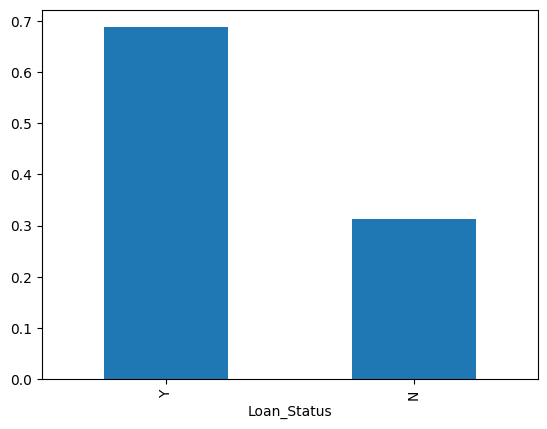

In [54]:
data['Loan_Status'].value_counts(normalize=True).plot.bar()

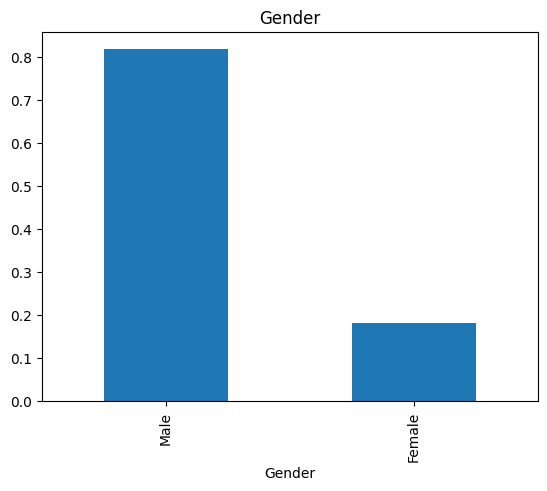

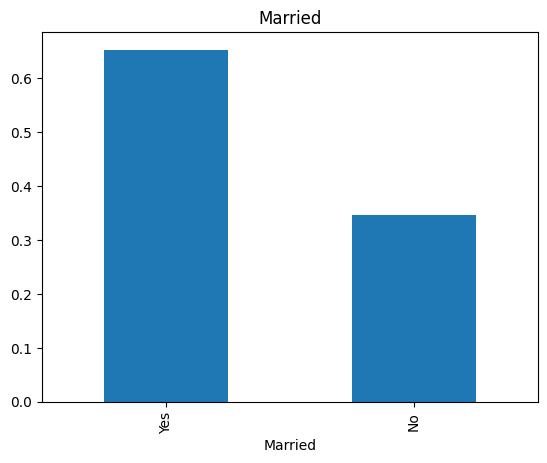

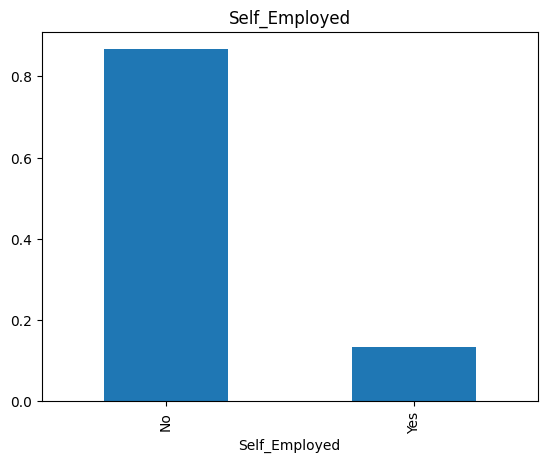

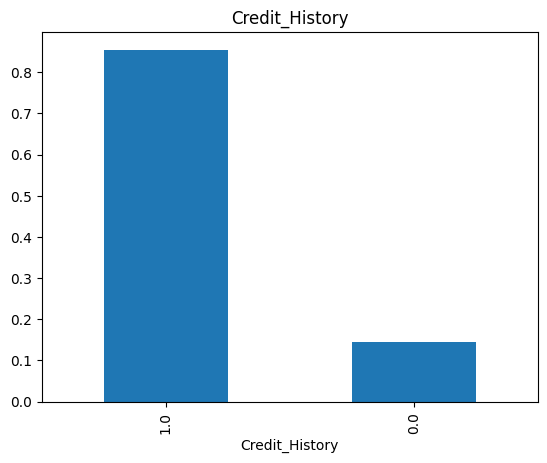

In [55]:
data['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.show()
data['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()
data['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()
data['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

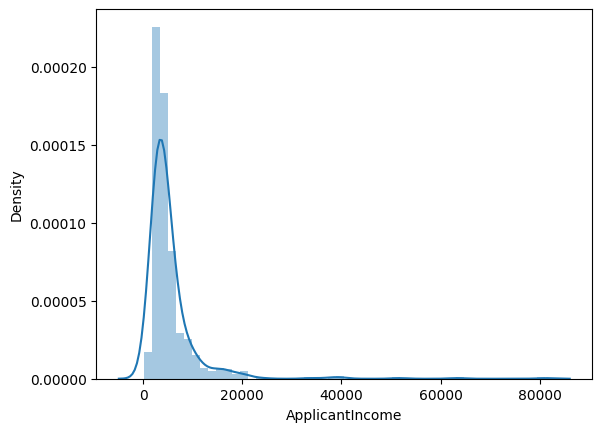

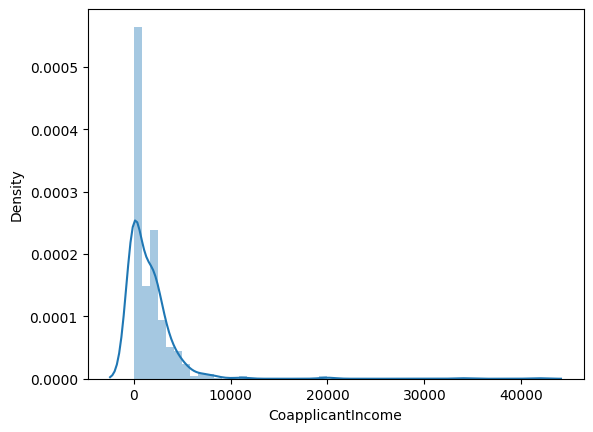

In [56]:
sns.distplot(data['ApplicantIncome'])
plt.show()
sns.distplot(data['CoapplicantIncome'])
plt.show()

# Data Processing and Feature Selection

In [61]:
data = data.drop(['Loan_ID'],axis=1)

In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_var = ['Gender','Married','Education','Credit_History','Property_Area','Dependents','Self_Employed','Loan_Status']
for i in cat_var:
    data[i]=le.fit_transform(data[i])
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1,2,1


In [63]:
from sklearn.model_selection import train_test_split 
X = data.drop(['Loan_Status'],axis=1) 
Y = data['Loan_Status']   
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=46) 

In [64]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((491, 11), (123, 11), (491,), (123,))

In [65]:
# to convert to a numpy array
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [66]:
print(type(X_train))

<class 'numpy.ndarray'>


# Training and testing the model

# Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
LC = LogisticRegression()
result = LC.fit(X_train,Y_train)

In [68]:
pred_log=result.predict(X_test)
pred_log

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

# Decision Tree Classifier

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
dc = DecisionTreeClassifier(random_state=0)
dts = dc.fit(X_train,Y_train) # dts = Decision Tree Classifier

In [71]:
pred_dts = dts.predict(X_test)

In [72]:
pred_dts

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

# Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 50,criterion = 'entropy', random_state = 42)
RFC = RF.fit(X_train, Y_train) # Rfc= RandomForestClassifier

In [74]:
pred_rfc = RFC.predict(X_test)

In [75]:
pred_rfc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

# KNN Algorithm

In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
my_model_knn = KNeighborsClassifier(n_neighbors = 2) # i.e k=2
result_knn = my_model_knn.fit(X_train,Y_train)

In [78]:
pred_knn =result_knn.predict(X_test)

In [79]:
pred_knn

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1], dtype=int64)

# Support Vector Machine

In [80]:
from sklearn.svm import SVC
my_model_svm = SVC(kernel = 'rbf', random_state = 0)
result_svm = my_model_svm.fit(X_train, Y_train)

In [81]:
pred_svm = result_svm.predict(X_test)

In [82]:
pred_svm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

# Result analysis

In [83]:
from sklearn.metrics import accuracy_score

In [85]:
print(" Accuracy_Score of Logistic Regression:", accuracy_score(Y_test, pred_log))
print(" Accuracy_Score of Random Forest:", accuracy_score(Y_test, pred_rfc))
print(" Accuracy_Score of KNN :", accuracy_score(Y_test, pred_knn))
print(" Accuracy_Score of SVM :", accuracy_score(Y_test, pred_svm))

 Accuracy_Score of Logistic Regression: 0.8373983739837398
 Accuracy_Score of Random Forest: 0.8048780487804879
 Accuracy_Score of KNN : 0.6422764227642277
 Accuracy_Score of SVM : 0.8292682926829268


In [86]:
from sklearn.metrics import f1_score

In [87]:
print(f1_score(Y_test, pred_rfc))

0.8749999999999999


In [88]:
from sklearn.metrics import confusion_matrix

In [89]:
confusion_log = confusion_matrix(Y_test,pred_log)
confusion_svm = confusion_matrix(Y_test,pred_svm)
confusion_rfc = confusion_matrix(Y_test,pred_rfc)
confusion_knn = confusion_matrix(Y_test,pred_knn)

In [90]:
confusion_df1 = pd.DataFrame(confusion_log, index=['Actual 0','Actual 1'], columns=['Predicted 0','Predicted 1'])
confusion_df2 = pd.DataFrame(confusion_svm, index=['Actual 0','Actual 1'], columns=['Predicted 0','Predicted 1'])
confusion_df3 = pd.DataFrame(confusion_rfc, index=['Actual 0','Actual 1'], columns=['Predicted 0','Predicted 1'])
confusion_df4 = pd.DataFrame(confusion_knn, index=['Actual 0','Actual 1'], columns=['Predicted 0','Predicted 1'])

<Axes: >

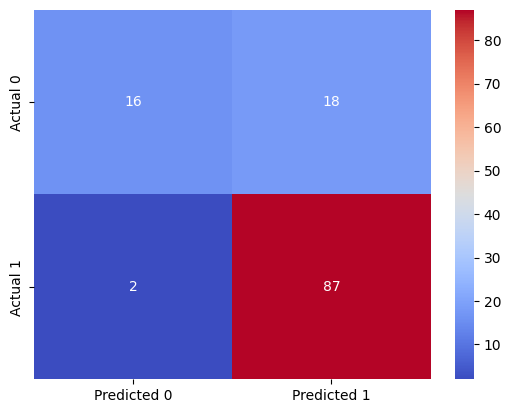

In [91]:
sns.heatmap(confusion_df1, cmap='coolwarm', annot=True)

<Axes: >

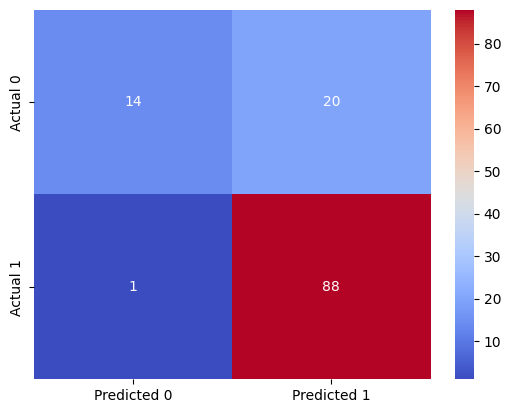

In [92]:
sns.heatmap(confusion_df2, cmap='coolwarm', annot=True)

<Axes: >

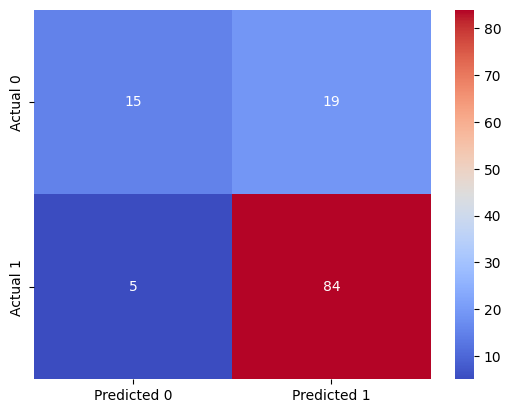

In [93]:
sns.heatmap(confusion_df3, cmap='coolwarm', annot=True)

<Axes: >

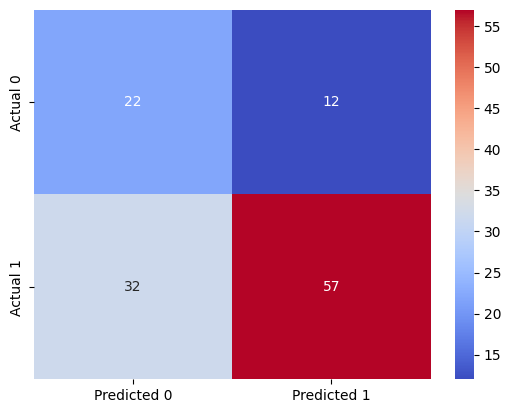

In [94]:
sns.heatmap(confusion_df4, cmap='coolwarm', annot=True)

In [95]:
from sklearn import metrics
print('\n**Classification Report SVM:\n',metrics.classification_report(Y_test,pred_svm))
print('\n**Classification Report Logistic Regression:\n',metrics.classification_report(Y_test,pred_log))
print('\n**Classification Report RandomForest:\n',metrics.classification_report(Y_test,pred_rfc))
print('\n**Classification Report KNN:\n',metrics.classification_report(Y_test,pred_knn))


**Classification Report SVM:
               precision    recall  f1-score   support

           0       0.93      0.41      0.57        34
           1       0.81      0.99      0.89        89

    accuracy                           0.83       123
   macro avg       0.87      0.70      0.73       123
weighted avg       0.85      0.83      0.80       123


**Classification Report Logistic Regression:
               precision    recall  f1-score   support

           0       0.89      0.47      0.62        34
           1       0.83      0.98      0.90        89

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.76       123
weighted avg       0.85      0.84      0.82       123


**Classification Report RandomForest:
               precision    recall  f1-score   support

           0       0.75      0.44      0.56        34
           1       0.82      0.94      0.87        89

    accuracy                           0.80       123
   macro a

# Deploying new values to LR model

In [111]:
pred_new_log = result.predict([[1,1,1,0,0,4583,1508.0,128.0,360.0,1,0]])
pred_new_log

array([1], dtype=int64)

In [97]:
import joblib

In [98]:
lc = LogisticRegression()
lc_final=lc.fit(X,Y)

In [107]:
import pickle

file = 'ML_Model.pkl'
with open(file,'wb') as f:pickle.dump(lc_final,f)

In [108]:
with open(file,'rb') as f: k=pickle.load(f)

In [110]:
cy = k.predict([[1,0,0,0,0,5849,0.0,128.0,360.0,1,2]])
print(cy)

[1]
